<a href="https://colab.research.google.com/github/Bishalroybd/Neural-net/blob/main/Binary_class_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:

import os
import random
import shutil
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os, shutil
import cv2
import matplotlib.image as mpimg
import seaborn as sns
%matplotlib inline
plt.style.use('ggplot')

In [3]:
! pip install kaggle

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
! mkdir ~/.kaggle

In [6]:
! cp /content/drive/MyDrive/kaggle.json ~/.kaggle/kaggle.json

In [7]:
! chmod 600 ~/.kaggle/kaggle.json

# APTOS DOWNLOAD


In [8]:
! kaggle datasets download sovitrath/diabetic-retinopathy-224x224-gaussian-filtered

Dataset URL: https://www.kaggle.com/datasets/sovitrath/diabetic-retinopathy-224x224-gaussian-filtered
License(s): CC0-1.0


In [9]:
import zipfile
import os

# 1. Create the 'APTOS' folder if it doesn't exist
aptos_folder = '/content/APTOS'  # Define the path for the new folder
os.makedirs(aptos_folder, exist_ok=True)  # Create the folder

# 2. Define the path to the zip file
zip_file_path = '/content/diabetic-retinopathy-224x224-gaussian-filtered.zip'

# 3. Create a ZipFile object
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    # 4. Extract all contents to the 'APTOS' folder
    zip_ref.extractall(aptos_folder)

print(f"Files extracted to: {aptos_folder}")

Files extracted to: /content/APTOS


# IDRID


In [10]:
! kaggle datasets download aaryapatel98/indian-diabetic-retinopathy-image-dataset

Dataset URL: https://www.kaggle.com/datasets/aaryapatel98/indian-diabetic-retinopathy-image-dataset
License(s): Attribution 4.0 International (CC BY 4.0)


In [11]:
import zipfile
import os

# 1. Create the IDRID folder if it doesn't exist
idrid_folder = '/content/IDRID'
os.makedirs(idrid_folder, exist_ok=True)

# 2. Define the path to the zip file
zip_file_path = '/content/indian-diabetic-retinopathy-image-dataset.zip'

# 3. Create a ZipFile object
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    # 4. Extract all contents to the IDRID folder
    zip_ref.extractall(idrid_folder)

print(f"Files extracted to: {idrid_folder}")

Files extracted to: /content/IDRID


In [12]:
# IDRID
import os

IDRID_dir = "/content/IDRID"

print("Files in IDRID directory:", os.listdir(IDRID_dir))

Files in IDRID directory: ['B.%20Disease%20Grading', 'A.%20Segmentation', 'C.%20Localization']


In [13]:
! kaggle datasets download realhaadkhan/idrid-yolo

Dataset URL: https://www.kaggle.com/datasets/realhaadkhan/idrid-yolo
License(s): apache-2.0


In [14]:
import zipfile
import os

# 1. Create the IDRID folder if it doesn't exist
idrid_folder = '/content/idrid-yolo'
os.makedirs(idrid_folder, exist_ok=True)

# 2. Define the path to the zip file
zip_file_path = '/content/idrid-yolo.zip'

# 3. Create a ZipFile object
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    # 4. Extract all contents to the IDRID folder
    zip_ref.extractall(idrid_folder)

print(f"Files extracted to: {idrid_folder}")

Files extracted to: /content/idrid-yolo


# Classification


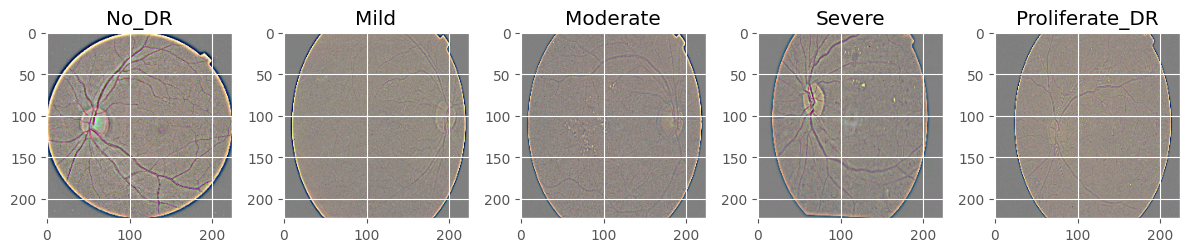

In [15]:
# Define the source directory containing the image folders (modify if needed)
src_dir = r'/content/APTOS/gaussian_filtered_images/gaussian_filtered_images'

# List of class/folder names
classes = ["No_DR", "Mild", "Moderate", "Severe", "Proliferate_DR"]

# Get a random image path for each class
random_image_paths = []
for class_name in classes:
    class_dir = os.path.join(src_dir, class_name)
    image_files = os.listdir(class_dir)  # Get list of image files in the class directory
    random_image_file = random.choice(image_files)  # Choose a random image file
    random_image_path = os.path.join(class_dir, random_image_file)  # Construct full path
    random_image_paths.append(random_image_path)

# Load the randomly selected images
images = [plt.imread(path) for path in random_image_paths]

# Define a grid layout
rows, cols = 1, 5

# Create a figure and a grid of axes (adjust figsize as needed)
fig, axes = plt.subplots(rows, cols, figsize=(12, 4))

# Loop through each image and corresponding axis
for i, (ax, image) in enumerate(zip(axes.flat, images)):
    ax.imshow(image)
    ax.set_title(classes[i])  # Use the class name as the title

# Adjust spacing and display the figures
plt.tight_layout()
plt.show()

In [16]:
# Load the training data from the input folder.
df = pd.read_csv(r'/content/APTOS/train.csv')

# Check for missing values (fortunately none found)...
# ... and get an idea of the DataFrame's size (ok, who created the corpus told us the truth, there are 3662 images)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3662 entries, 0 to 3661
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   id_code    3662 non-null   object
 1   diagnosis  3662 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 57.3+ KB


In [17]:
# Preview the first few rows of the data to get familiar with its structure
df.head()

,id_code,diagnosis
0,000c1434d8d7,2
1,001639a390f0,4
2,0024cdab0c1e,1
3,002c21358ce6,0
4,005b95c28852,0


<Axes: ylabel='diagnosis'>

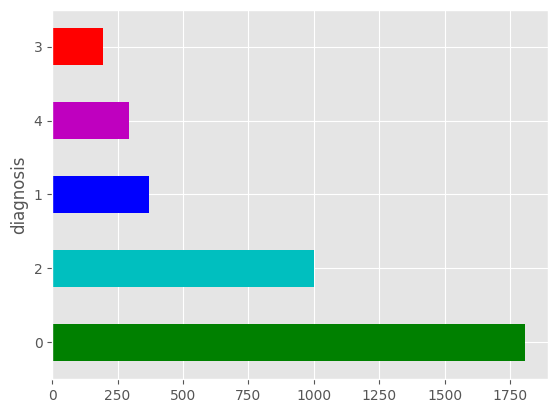

In [18]:
# Let's Visualize the distribution of classes in the 'diagnosis' column
df['diagnosis'].value_counts().plot(kind="barh", color=['g','c','b','m','r'])

In [19]:
# Mapping the diagnosis to the types
diagnosis_lookup = {
    0: "No_DR",
    1: 'Mild' ,
    2: 'Moderate',
    3: 'Severe',
    4: 'Proliferate_DR'
}

# Create a new column for binary classification (No_DR vs DR)
df['disease_presence'] = np.where(df['diagnosis'] < 1, 'No_DR', 'DR')

# Create a new column for mapping diagnosis code to disease gravity using the lookup dictionary
df['gravity'] = df['diagnosis'].map(diagnosis_lookup.get)

# Preview the first few rows of the data to check the new data structure
df.head()

,id_code,diagnosis,disease_presence,gravity
0,000c1434d8d7,2,DR,Moderate
1,001639a390f0,4,DR,Proliferate_DR
2,0024cdab0c1e,1,DR,Mild
3,002c21358ce6,0,No_DR,No_DR
4,005b95c28852,0,No_DR,No_DR


<Axes: xlabel='disease_presence'>

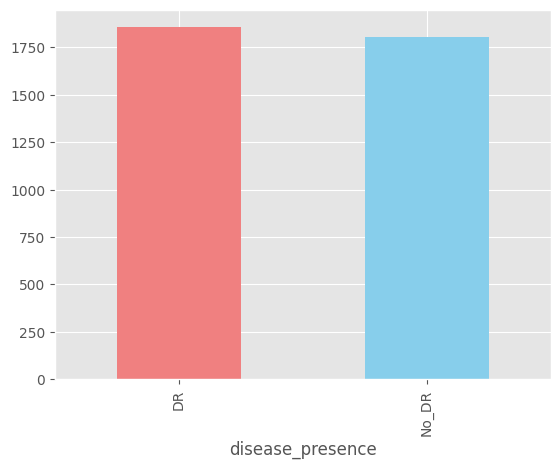

In [20]:
# Let's visualize the distribution of disease presence after conversion to a binary format
# much better now, rihgt? (づ｡◕‿‿｡)づ
df['disease_presence'].value_counts().plot(kind='bar', color=['lightcoral', 'skyblue'])

In [21]:
# Split the data into training and validation sets (80%/20%)
train_intermediate, val = train_test_split(
    df,
    test_size = 0.2,
    stratify = df['gravity']
)

# Further split the training set into training and test sets (80% of training data / 20% of training data)
train, test = train_test_split(
    train_intermediate,
    test_size = 0.2 / (1 - 0.2),
    stratify = train_intermediate['gravity']
)

# Print class distribution for each split (train, test, validation)
print(train['gravity'].value_counts(), '\n')
print(test['gravity'].value_counts(), '\n')
print(val['gravity'].value_counts(), '\n')

gravity
No_DR             1083
Moderate           599
Mild               222
Proliferate_DR     177
Severe             115
Name: count, dtype: int64 

gravity
No_DR             361
Moderate          200
Mild               74
Proliferate_DR     59
Severe             39
Name: count, dtype: int64 

gravity
No_DR             361
Moderate          200
Mild               74
Proliferate_DR     59
Severe             39
Name: count, dtype: int64 



In [22]:
# Function to prepare image data for training: organize image files into training, validation, and test folders based on binary disease presence classification.
# This utility is required to retrieve files in a later step using ImageDataGenerator.
def images_to_folders(splits):
    """
    Organize images into folders based on disease presence classification.
    This function takes a dictionary `splits` containing separate DataFrames for training,
    validation, and test sets. It then organizes the corresponding images from the source
    directory (`src_dir`) into subfolders within a base directory (`base_dir`) based on
    the binary disease presence classification ("train", "val", and "test").

    Args:
        splits (dict): A dictionary containing DataFrames for training, validation, and test sets.
        Each DataFrame should have columns for 'id_code', 'gravity' (original diagnosis),
        and 'disease_presence' (binary classification).

    Returns:
        None (function modifies file structure)
    """
    src_dir = r'/content/APTOS/gaussian_filtered_images/gaussian_filtered_images'
    base_dir = ''
    sub_dirs = ["train", "val", "test"]
    for directory in sub_dirs:
        dir_path = os.path.join(base_dir, directory)
        if os.path.exists(dir_path):
            shutil.rmtree(dir_path)
        os.makedirs(dir_path, exist_ok=True)

    for split, sub_dir in zip(splits, sub_dirs):
        for index, row in split.iterrows():
            final_diagnosis = row['gravity']
            binary_diagnosis = row['disease_presence']
            id_code = row['id_code'] + ".png"
            srcfile = os.path.join(src_dir, final_diagnosis, id_code)
            dstfile = os.path.join(base_dir, sub_dir, binary_diagnosis)
            os.makedirs(dstfile, exist_ok=True)
            shutil.copy(srcfile, dstfile)

In [23]:
# Time to move files around. AccioImaginis!
images_to_folders([train, val, test])

In [24]:
# Loading images from specified directories, creating batches for training/validation/testing.
# ImageDataGenerator offers useful functionalities like:
    # - Rescaling pixel values to the 0-1 range for improved training performance.
    # - Shuffling data during training to prevent overfitting.
    # (Target size is not required in our case, but it's a valuable option that I wanted to show you)

train_set = ImageDataGenerator(rescale = 1./255).flow_from_directory(
    "train",
    target_size=(224,224),
    shuffle = True)

val_set = ImageDataGenerator(rescale = 1./255).flow_from_directory(
    "val",
    target_size=(224,224),
    shuffle = True)

test_set = ImageDataGenerator(rescale = 1./255).flow_from_directory(
    "test",
    target_size=(224,224),
    shuffle = False)

Found 2196 images belonging to 2 classes.
Found 733 images belonging to 2 classes.
Found 733 images belonging to 2 classes.


In [25]:
model = tf.keras.Sequential([

    # --- Convolutional layers for feature extraction:
    layers.Conv2D(12, (3, 3), padding="valid", input_shape=(224, 224, 3), use_bias=False),  # Initial convolutional layer (with bias disabled for BatchNormalization)
    layers.MaxPooling2D(pool_size=(2, 2)),  # Downsample for spatial invariance
    layers.BatchNormalization(),  # Normalize activations for stability
    layers.Activation("relu"),  # Apply ReLU non-linearity for non-linearity

    layers.Conv2D(24, (3, 3), padding="valid", use_bias=False),  # Intermediate convolutional layer
    layers.MaxPooling2D(pool_size=(2, 2)),  # Further downsampling
    layers.BatchNormalization(),
    layers.Activation("relu"),

    layers.Conv2D(48, (4, 4), padding="valid", use_bias=False),  # Deeper convolutional layer
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.BatchNormalization(),
    layers.Activation("relu"),

    # --- Classification head:
    layers.Flatten(),  # Flatten feature maps for dense layers
    layers.Dense(48, activation='relu'),  # Fully connected layer for non-linear learning
    # layers.Dropout(0.2),  # Regularization (optional, currently commented out)
    layers.Dense(2, activation='softmax')  # Output layer with softmax for binary classification
])

# --- Configure model training:
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-5),  # Use Adam optimizer with a low learning rate
    loss=tf.keras.losses.BinaryCrossentropy(),  # Appropriate loss for binary classification
    metrics=['acc']  # Track accuracy during training
)

# --- Callbacks for saving best model:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="checkpoint.keras",  # Filepath to save model checkpoints
        save_best_only=True,  # Only save the best-performing model
        monitor="val_loss"   # Monitor validation loss to determine best model
    )
]

# --- Train the model:
history = model.fit(
    train_set,                       # Train on the training set
    epochs=60,                       # Number of training epochs.
    validation_data=val_set,         # Validate model performance on validation set
    callbacks=callbacks              # Use model checkpointing for best model preservation
)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/60


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


69/69 ━━━━━━━━━━━━━━━━━━━━ 19s 182ms/step - acc: 0.8143 - loss: 0.4436 - val_acc: 0.5757 - val_loss: 0.6887
Epoch 2/60
69/69 ━━━━━━━━━━━━━━━━━━━━ 12s 127ms/step - acc: 0.8978 - loss: 0.2445 - val_acc: 0.5662 - val_loss: 0.6873
Epoch 3/60
69/69 ━━━━━━━━━━━━━━━━━━━━ 8s 115ms/step - acc: 0.9358 - loss: 0.1870 - val_acc: 0.6835 - val_loss: 0.6678
Epoch 4/60
69/69 ━━━━━━━━━━━━━━━━━━━━ 7s 107ms/step - acc: 0.9336 - loss: 0.1826 - val_acc: 0.8513 - val_loss: 0.6080
Epoch 5/60
69/69 ━━━━━━━━━━━━━━━━━━━━ 9s 131ms/step - acc: 0.9505 - loss: 0.1610 - val_acc: 0.8772 - val_loss: 0.5141
Epoch 6/60
69/69 ━━━━━━━━━━━━━━━━━━━━ 7s 107ms/step - acc: 0.9585 - loss: 0.1519 - val_acc: 0.8936 - val_loss: 0.3888
Epoch 7/60
69/69 ━━━━━━━━━━━━━━━━━━━━ 9s 133ms/step - acc: 0.9606 - loss: 0.1387 - val_acc: 0.8990 - val_loss: 0.3085
Epoch 8/60
69/69 ━━━━━━━━━━━━━━━━━━━━ 8s 115ms/step - acc: 0.9560 - loss: 0.1354 - val_acc: 0.9168 - val_loss: 0.2305
Epoch 9/60
69/69 ━━━━━━━━━━━━━━━━━━━━ 7s 102ms/step - acc: 0.9555

In [26]:
# Evaluate the model's performance on the unseen test set
loss, acc = model.evaluate(test_set, verbose=1)
print("Accuracy: ", acc)

23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 72ms/step - acc: 0.9633 - loss: 0.1347
Accuracy:  0.9577080607414246


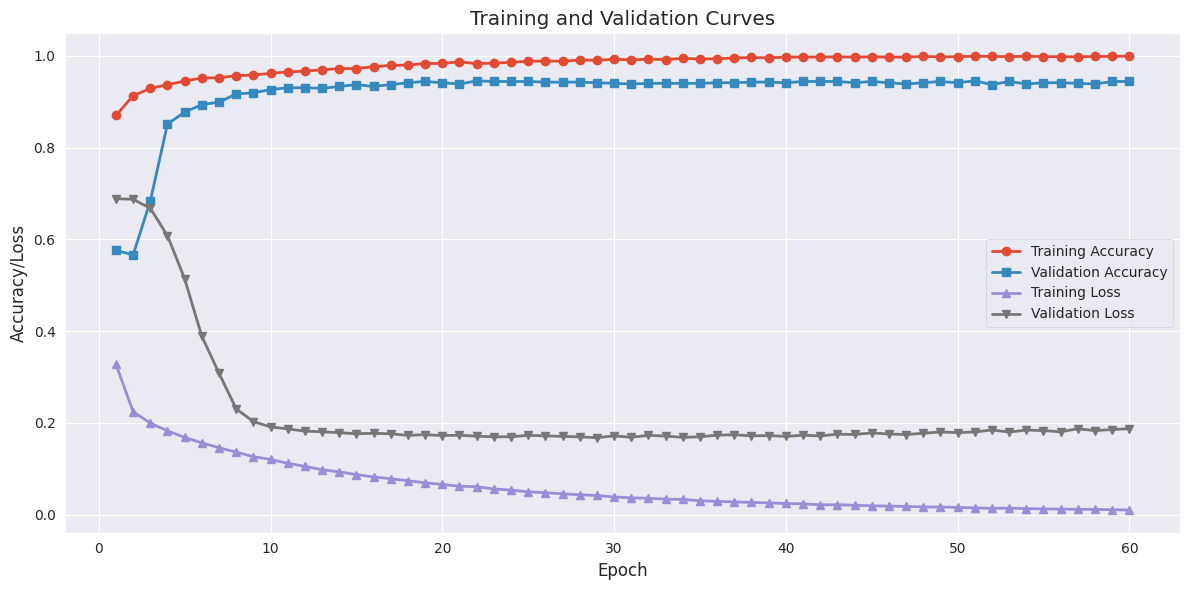

In [27]:
# Plot training and validation curves to visualize model performance

sns.set_style("darkgrid")  # Set plot style

# Extract training and validation data from history object
acc = history.history["acc"]
val_acc = history.history["val_acc"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(acc) + 1)  # Create epoch labels (1-based indexing)

# Create the plot
plt.figure(figsize=(12, 6))  # Set figure size

# Plot training and validation accuracy/loss curves
plt.plot(epochs, acc, label="Training Accuracy", marker='o', linewidth=2)
plt.plot(epochs, val_acc, label="Validation Accuracy", marker='s', linewidth=2)
plt.plot(epochs, loss, label="Training Loss", marker='^', linewidth=2)
plt.plot(epochs, val_loss, label="Validation Loss", marker='v', linewidth=2)

# Add labels and title
plt.title("Training and Validation Curves")
plt.ylabel("Accuracy/Loss")
plt.xlabel("Epoch")

# Add labels and title
plt.legend()
plt.grid(True)

# Improve layout and display plot
plt.tight_layout()
plt.show()

23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 85ms/step


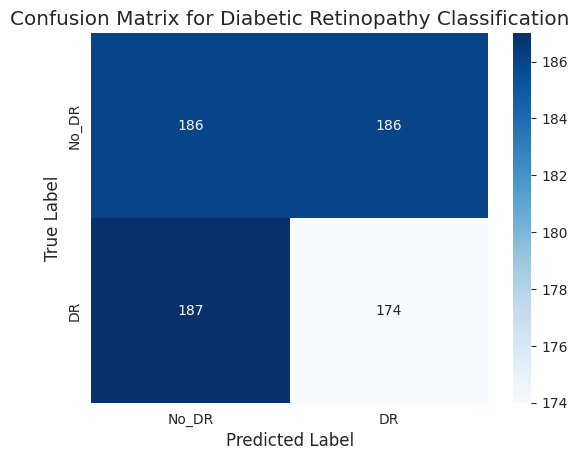

In [28]:
# Let's draw the Confusion Matrix for further evaluation

# Encode true labels using LabelEncoder
le = LabelEncoder()
true_labels = le.fit_transform(test['disease_presence'])

# Make predictions on the test set and get probabilities
predictions = model.predict(test_set)

# Apply a threshold on probabilities to get class labels
threshold = 0.5  # You can adjust this threshold based on your model's behavior
predicted_labels = np.where(predictions[:, 1] > threshold, 1, 0)  # 1 for positive class, 0 for negative

# Generate the confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)

# Plot the confusion matrix using libraries like seaborn
class_names = ['No_DR', 'DR']
sns.heatmap(
    cm,
    annot=True,
    fmt="d",
    cmap='Blues',
    xticklabels=class_names,
    yticklabels=class_names
)  # Customize the plot as needed

plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for Diabetic Retinopathy Classification')
plt.show()